# Bank Note Fraud Detection using Random Forest Classifier

In [76]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

The data consists of 5 columns:

variance of Wavelet Transformed image

skewness of Wavelet Transformed image

curtosis of Wavelet Transformed image

entropy of image 

class (integer) - Authentic 1 vs Fake 0

Where class indicates whether or not a Bank Note was authentic.

In [77]:
df=pd.read_csv('/content/bank_note_data (1).csv')
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<Axes: xlabel='Class', ylabel='count'>

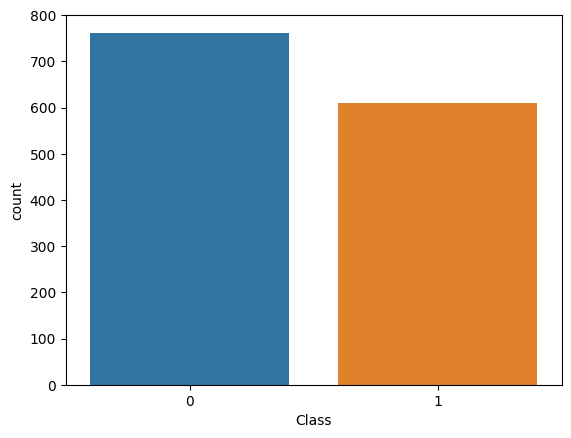

In [78]:
sns.countplot(data=df,x='Class')

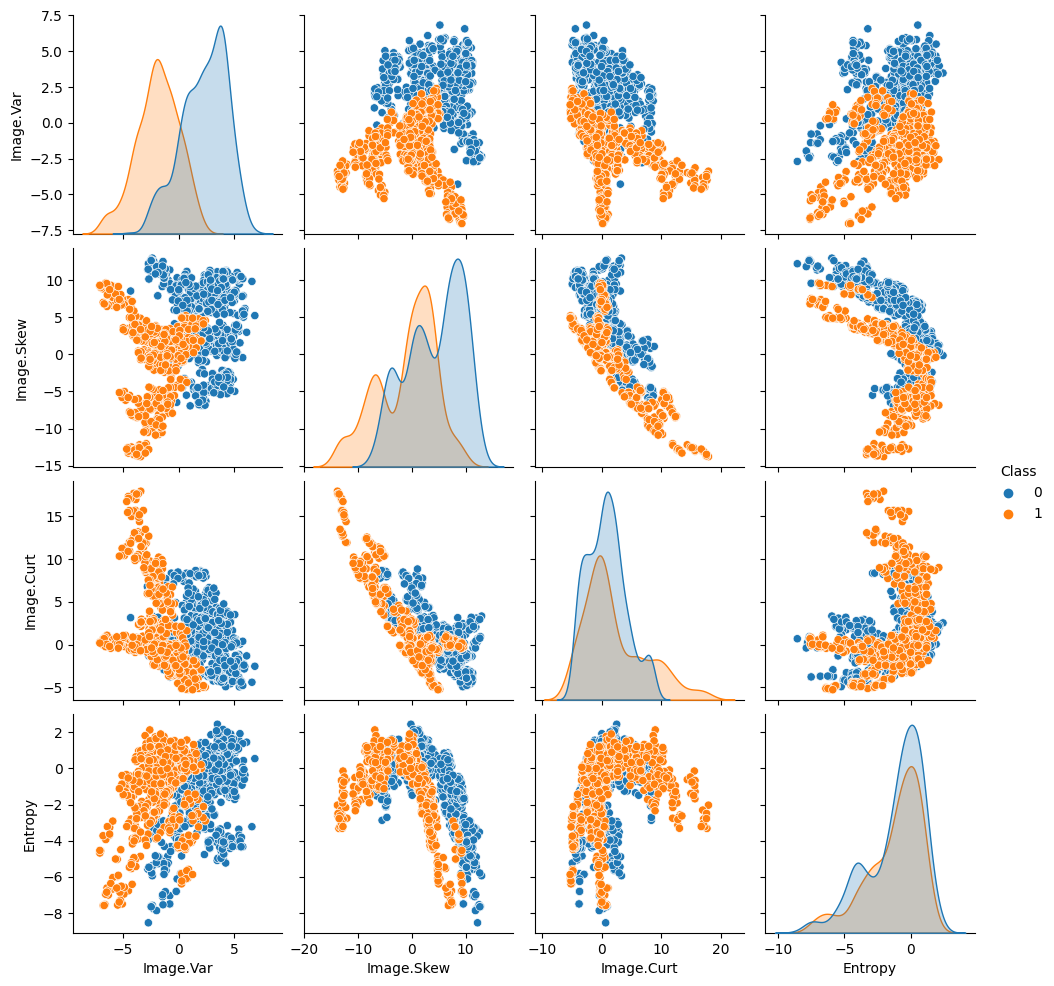

In [79]:

sns.pairplot(df, hue='Class')

In [80]:
scaler=StandardScaler()

df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [81]:
x=df.drop(['Class'],axis=1)
y=df['Class']
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [82]:

X=scaler.fit_transform(x)
X

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [131]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [148]:
len(y_test)

275

In [133]:

X_train = np.float32(X_train)
X_test = np.float32(X_test)

In [152]:
rfc=RandomForestClassifier(n_estimators=200)

In [153]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [154]:
y_preds=rfc.predict(X_test)

[[148   0]
 [  2 125]]


<Axes: >

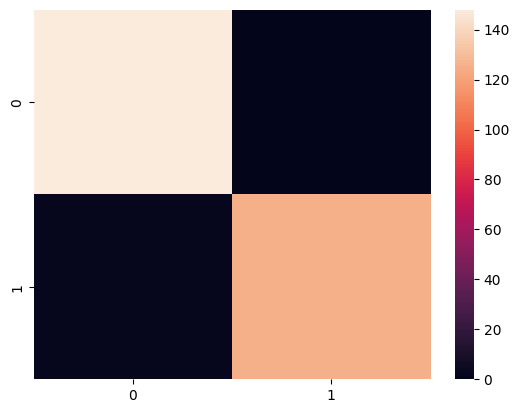

In [156]:
cn=confusion_matrix(y_test,y_preds)
print(confusion_matrix(y_test,y_preds))
sns.heatmap(cn)

In [107]:
cr=classification_report(y_test,y_preds)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [157]:
rfc.score(X_test,y_test)

0.9927272727272727